In [144]:
import requests
from tensorflow import keras
from keras.datasets import mnist
from numpy import argmax
import matplotlib.pyplot as plt
import json

In [145]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [146]:
x_test_reshape = X_test.reshape(10000, 784).astype('float32')
y_test_reshape = y_test.reshape(10000, 1)

x_test_reshape /= 255

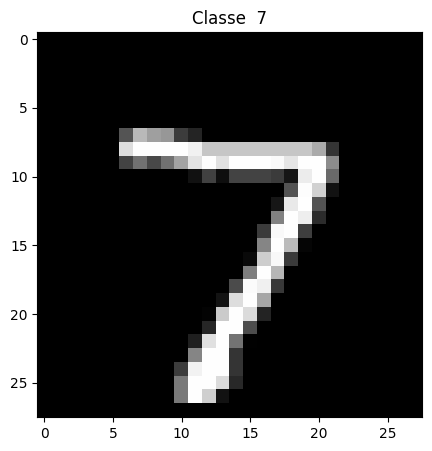

Classe prevista: 7


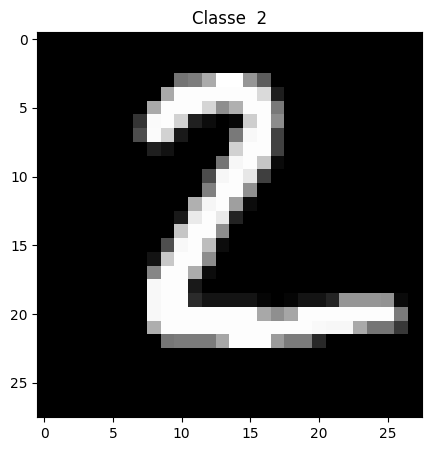

Classe prevista: 2


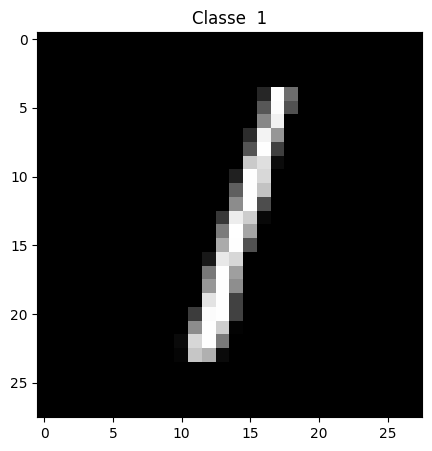

Classe prevista: 1


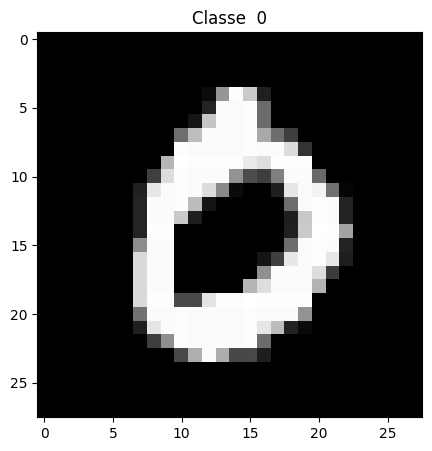

Classe prevista: 0


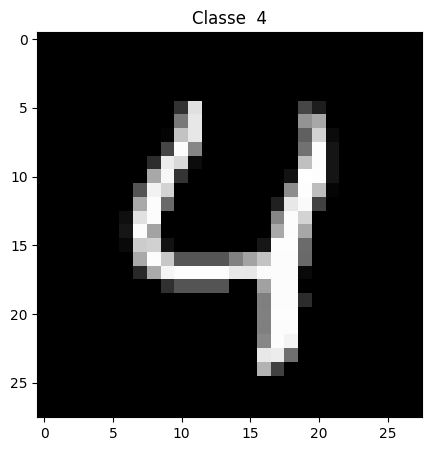

Classe prevista: 4


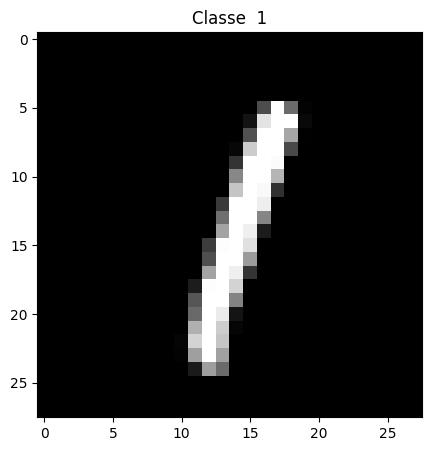

Classe prevista: 1


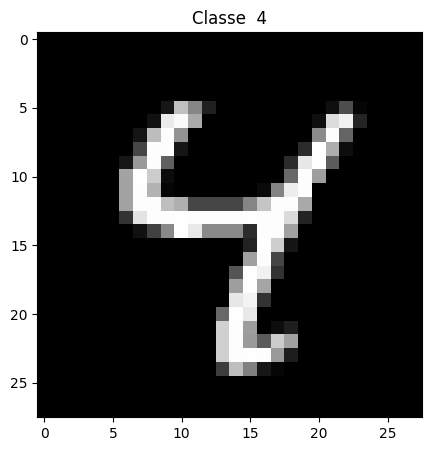

Classe prevista: 4


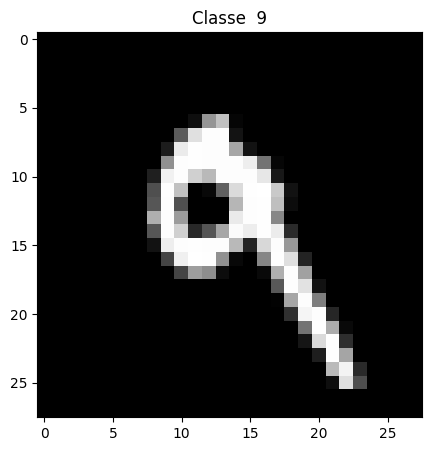

Classe prevista: 9


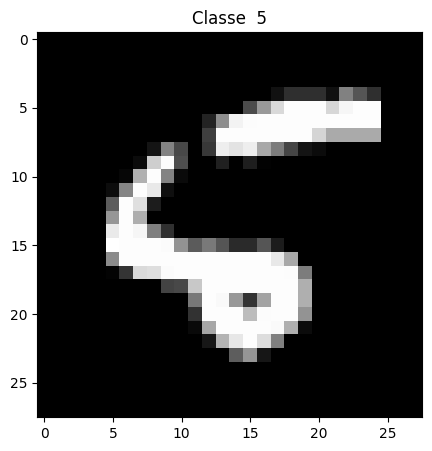

Classe prevista: 5


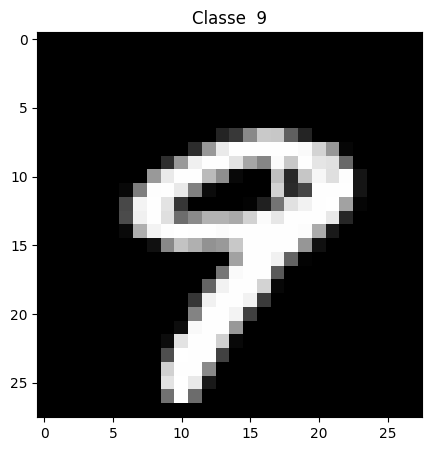

Classe prevista: 9


In [147]:
for i in range(10):
    data_send = x_test_reshape[i].tolist()

    payload = {
        "inputs": [data_send]
    }

    plt.figure(figsize=(5,5))
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'Classe  {y_test[i]}')
    plt.show()

    r = requests.post('http://localhost:2021/invocations',
                   headers= {'Content-Type': 'application/json'},
                   data=json.dumps(payload))
    
    print(f'Classe prevista: {argmax(r.json()["predictions"])}')
